In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [53]:
data = pd.read_csv('Datasets/Boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [54]:
data = data.dropna()

In [55]:
data = data.drop_duplicates()

In [56]:
list(data.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [57]:
data = data.rename(columns = {'CRIM':'crimeRatePerCapita', 
 ' ZN ':'landOver25K_sqft', 
 'INDUS ':'non-retailLandProptn', 
 'CHAS':'riverDummy', 
 'NOX':'nitrixOxide_pp10m', 
 'RM':'AvgNo.RoomsPerDwelling', 
 'AGE':'ProptnOwnerOccupied', 
 'DIS':'weightedDist', 
 'RAD':'radialHighwaysAccess', 
 'TAX':'propTaxRate_per10K', 
 'PTRATIO':'pupilTeacherRatio', 
 'LSTAT':'pctLowerStatus', 
 'MEDV':'medianValue_Ks'}) 

data.head()

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25K_sqft        506 non-null    float64
 2   non-retailLandProptn    506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwaysAccess    506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [60]:
X = data.drop('crimeRatePerCapita', axis=1)
y = data['crimeRatePerCapita']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [61]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [62]:
train_data.head()

,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
97,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,4.21,38.7,0.12083
130,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437,21.2,12.60,19.2,0.34006
477,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,24.91,12.0,15.02340
345,0.0,4.39,0,0.442,6.014,48.5,8.0136,3,352,18.8,10.53,17.5,0.03113
84,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,9.62,23.9,0.05059


In [63]:
test_data.head()

,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
305,33.0,2.18,0,0.472,6.616,58.1,3.3700,7,222,18.4,8.93,28.4,0.05479
193,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,5.03,31.1,0.02187
65,80.0,3.37,0,0.398,6.290,17.8,6.6115,4,337,16.1,4.67,23.5,0.03584
349,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,5.89,26.6,0.02899
151,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403,14.7,13.28,19.6,1.49632


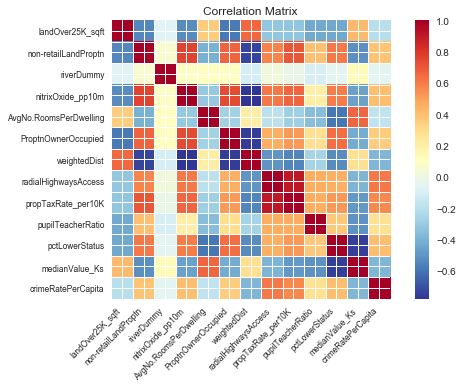

In [64]:
corrMatrix = train_data.corr(method = 'pearson')
xnames = list(train_data.columns)
ynames = list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames, title=None, 
          normcolor=False, cmap='RdYlBu_r')
plt.show()

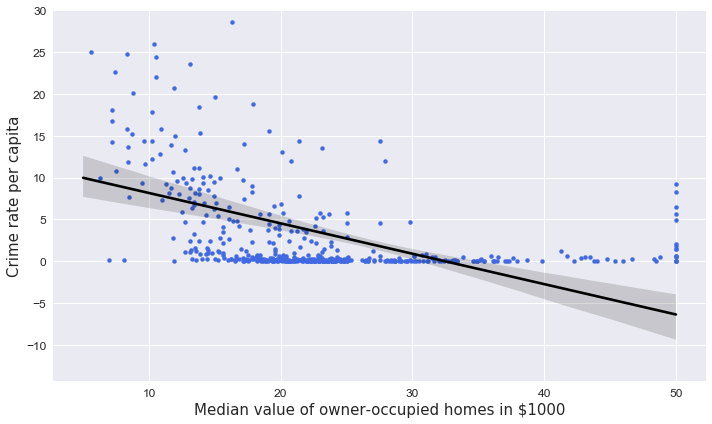

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks', y='crimeRatePerCapita', ci=95
            , data=data,
           ax=ax, color='k', scatter_kws={'s': 20, 'color':'royalblue', 'alpha': 1})

ax.set_xlabel('Median value of owner-occupied homes in $1000', fontsize=15, fontname='DejaVu Sans')
ax.set_ylabel('Crime rate per capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

In [66]:
linearModel = smf.ols(formula='crimeRatePerCapita ~ medianValue_Ks', data=data)
linearModelResult = linearModel.fit()
print(linearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.17e-19
Time:                        16:23:33   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.7965      0.934     12.

In [69]:
linearModel = smf.ols(formula='np.log(crimeRatePerCapita) ~ medianValue_Ks', data=data)
linearModelResult = linearModel.fit()
print(linearModelResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.206
Model:                                    OLS   Adj. R-squared:                  0.205
Method:                         Least Squares   F-statistic:                     131.1
Date:                        Wed, 29 Apr 2020   Prob (F-statistic):           3.90e-27
Time:                                16:41:09   Log-Likelihood:                -1049.2
No. Observations:                         506   AIC:                             2102.
Df Residuals:                             504   BIC:                             2111.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [70]:
multiLinearModel = smf.ols(formula='crimeRatePerCapita ~ pctLowerStatus + radialHighwaysAccess +\
                            medianValue_Ks + nitrixOxide_pp10m', data=data)
multiLinearModelResult = multiLinearModel.fit()
print(multiLinearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     92.61
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           6.49e-59
Time:                        16:47:23   Log-Likelihood:                -1666.3
No. Observations:                 506   AIC:                             3343.
Df Residuals:                     501   BIC:                             3364.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.4425 

In [74]:
multiLogLinearModel = smf.ols(formula='np.log(crimeRatePerCapita) ~ (pctLowerStatus + radialHighwaysAccess +\
                            medianValue_Ks + nitrixOxide_pp10m) ** 2', data=data)
multiLogLinearModelResult = multiLogLinearModel.fit()
print(multiLogLinearModelResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.883
Model:                                    OLS   Adj. R-squared:                  0.880
Method:                         Least Squares   F-statistic:                     372.7
Date:                        Wed, 29 Apr 2020   Prob (F-statistic):          3.90e-223
Time:                                17:20:31   Log-Likelihood:                -565.32
No. Observations:                         506   AIC:                             1153.
Df Residuals:                             495   BIC:                             1199.
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------